<a href="https://colab.research.google.com/github/DrBharathiTC/Yesbankstockpriceprediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Closing Price Prediction**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

In [ ]:
# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Importing and Loading data

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# using pandas library and 'read_csv' function to read YesBank_StockPrices csv file
YBCPP=pd.read_csv("/content/drive/My Drive/almabetter projects/YesBankStockPricePrediction/data_YesBank_StockPrices.csv")

# Data Exploration

In [ ]:
#number of rows and columns 
YBCPP.shape

(185, 5)

This Dataset has 185 observations in it with 5 columns(features)

In [ ]:
YBCPP.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Here showing in Dataset the First Five rows by using head() method 
YBCPP.head(5)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Here showing in Dataset the Last Five rows by using tail() method
YBCPP.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#information of the dataset 
YBCPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


There are multiple variable in the dataset - Date, Open, High and close The columns Open and Close represent the starting and final price.
The High, Low variable are represent the maximum and minimum.

In [ ]:
#description of the data in the dataset
YBCPP.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


Data Wrangling
Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

Objectives:
Handle missing values
Correct data format
Standardize and normalize data

In [ ]:
#Looking for missing values
YBCPP.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No missing values in dataset. Here our dataset in no nan values

In [ ]:
#Looking for duplicates in dataset
len(YBCPP[YBCPP.duplicated()])

0

Do not have any duplicates in dataset

Correct data format
We are almost there!
The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use:

.dtype() to check the data type

.astype() to change the data type

In [ ]:
YBCPP.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [ ]:
YBCPP['Date'].head()

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

The Given Date in data is format of Month-YY. We need to convert in proper date format of YYYY-MM-DD.
Since, Date column has dtype as object we've to convert it into datetime format

In [ ]:
# converting 'Date' into datetime - YYYY-MM-DD
# required the changing data type of date 
 
from datetime import datetime
YBCPP['Date'] = YBCPP['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [ ]:
#check dtype of date now
YBCPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Now Format and data type of date feature has changed into datetime.

Let's check it out

In [ ]:
YBCPP['Date'].head()

0   2005-07-01
1   2005-08-01
2   2005-09-01
3   2005-10-01
4   2005-11-01
Name: Date, dtype: datetime64[ns]

Converted in proper date format of YYYY-MM-DD(datetime format).

# Checking the Outlier


<Axes: >

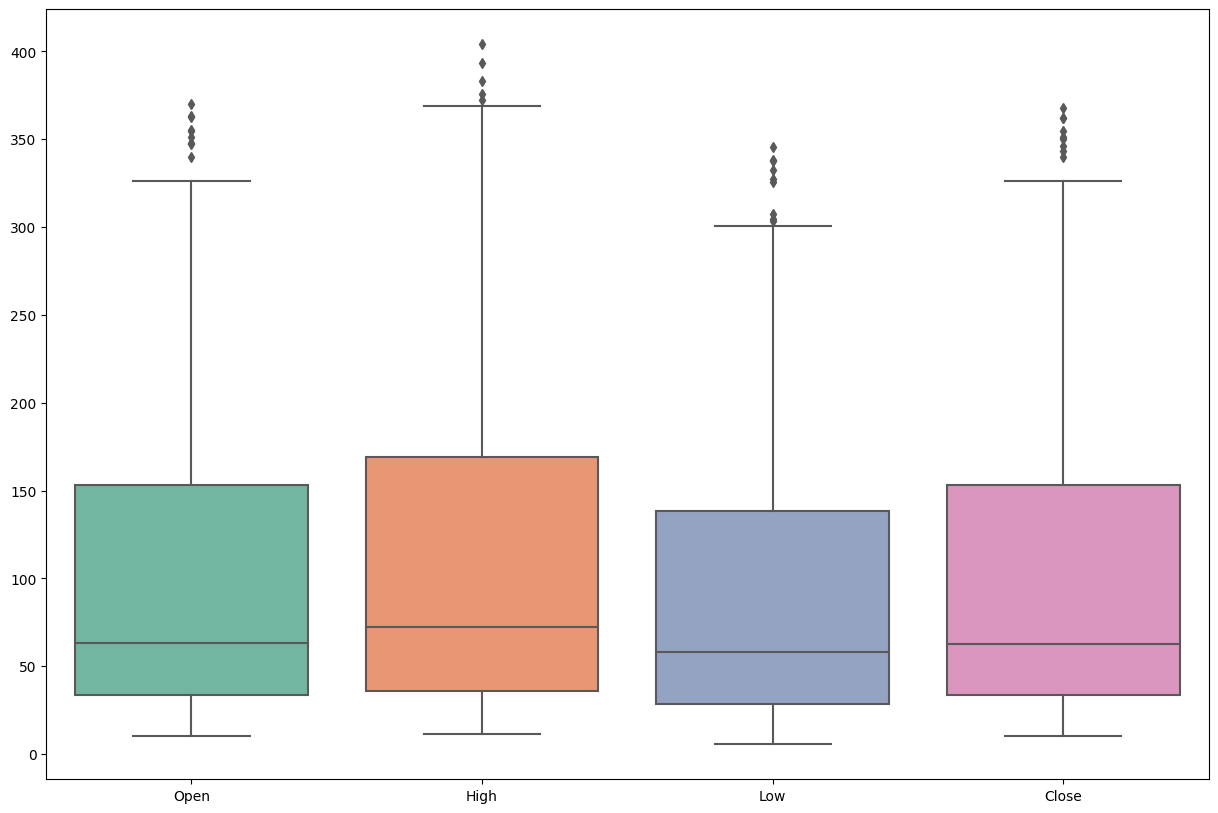

In [ ]:
plt.figure(figsize= (15, 10))
sns.boxplot(data=YBCPP, orient="V", palette="Set2")

Findings:

*All the features has median values between Rs 50 to Rs 80

*There is a presence of outliers in all the features variables


Data Wrangling finished. Dataset is clean and ready for exploratory data analysis

# EDA :Exploratory Data Analysis

## **UNIVARIATE ANALYSIS**

<h3>Visualising the data of dependant variable - LINE PLOT</h3>

[Text(0.5, 1.0, 'Yes Bank closing price'), Text(0.5, 0, 'Year')]

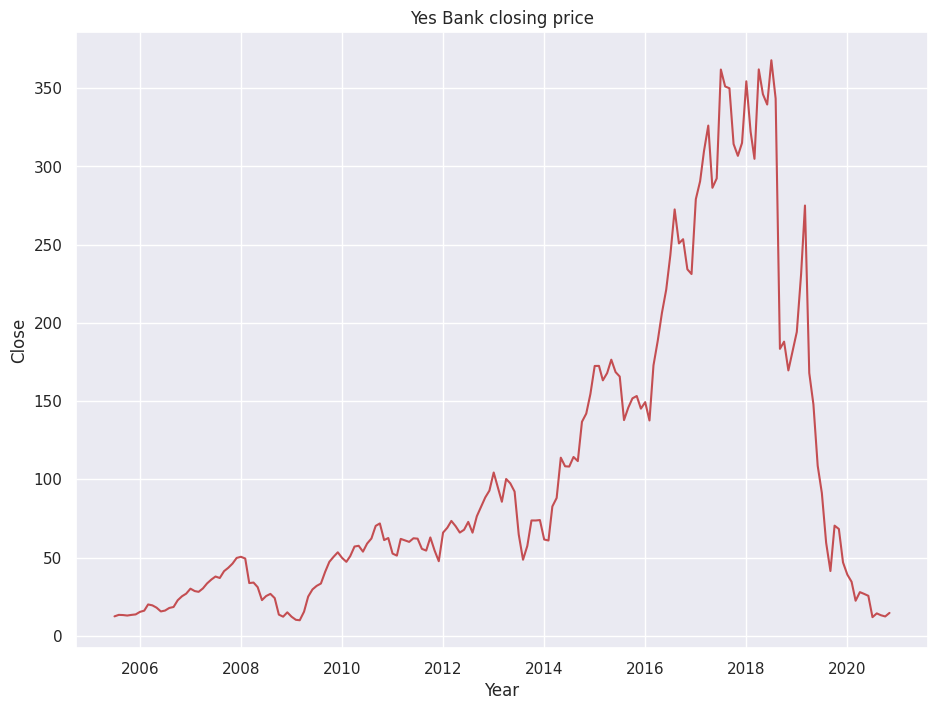

In [ ]:
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(11,8)})
sns.lineplot(x="Date", y="Close",data=YBCPP,color='r').set(title='Yes Bank closing price',xlabel='Year')

Now, We can easly see in above plot the trend is increasing from 2009 to 2018 but after that the trend decreases. This is because of the fraud case of involving Rana Kapoor.

The main objective is to predict the stock’s closing price, I will take close price as dependent variable(Target variable)

### Dependent variable of close price of stock - DISTPLOT

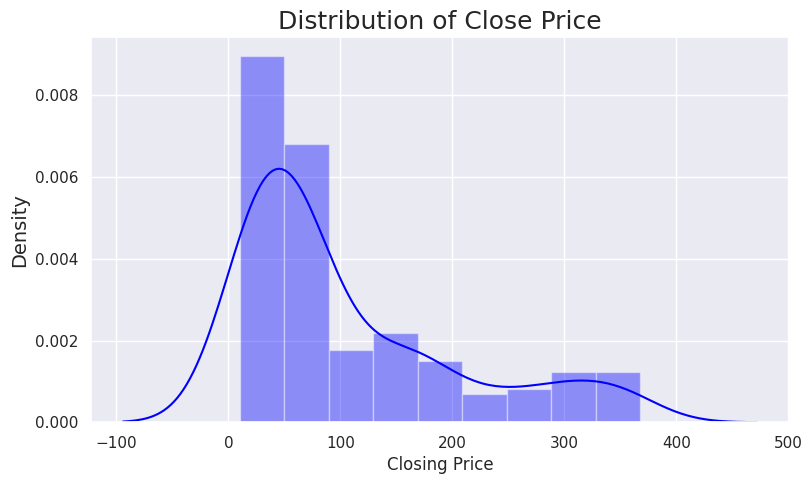

In [ ]:
# depndent variable is 'Close'
plt.figure(figsize = (9,5))
sns.distplot(YBCPP['Close'], color = 'blue',kde=True)
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 12)
plt.ylabel('Density', fontsize=14)
plt.show()

It is Right Skewed Distirbution

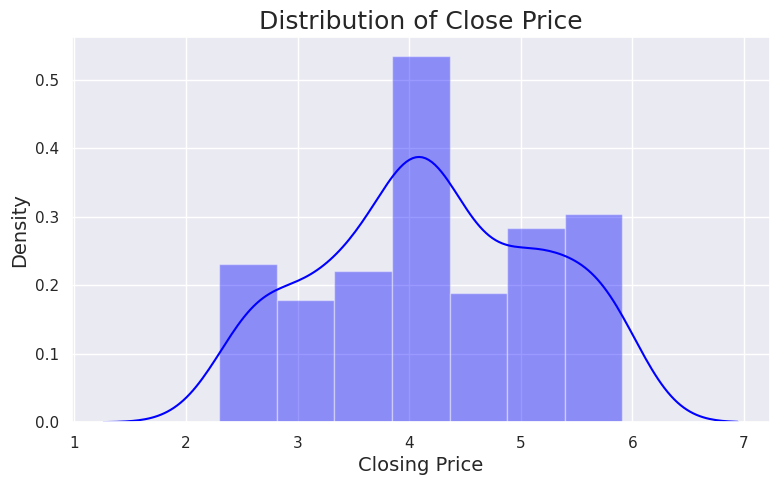

In [ ]:
# Distribution plot of closing price after applying log transformation

plt.figure(figsize = (9,5))
sns.distplot(np.log(YBCPP['Close']), color = 'blue')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 14)
plt.ylabel('Density', fontsize=14)
plt.show()

Applying log transformation to make it normal distribution.
The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

# Independent Variables Open , High and Low price of stock
Plotting distribution of Open , High and Low numerical Features

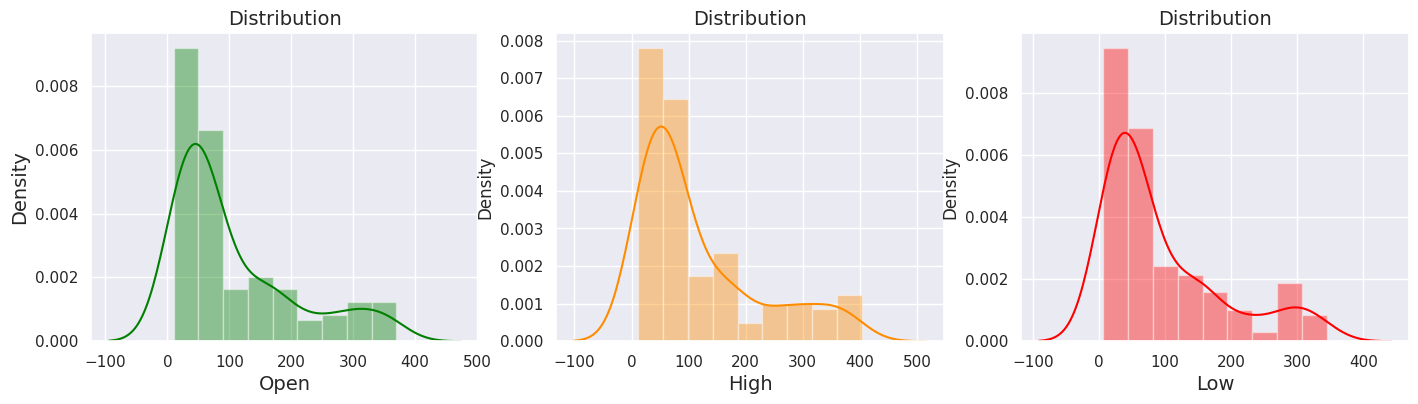

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(YBCPP['Open'], color = 'Green')
plt.title('Distribution', fontsize=14)
plt.xlabel('Open', fontsize= 14)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(YBCPP['High'], color = 'Darkorange')
plt.title('Distribution', fontsize=14)
plt.xlabel('High', fontsize= 14)

plt.subplot(1, 3, 3)
sns.distplot(YBCPP['Low'], color = 'Red')
plt.title('Distribution', fontsize=14)
plt.xlabel('Low', fontsize= 14)

plt.show()


It's looking like rightly skewed for all features.

### Applying log transformation to make it normal distribution.


The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

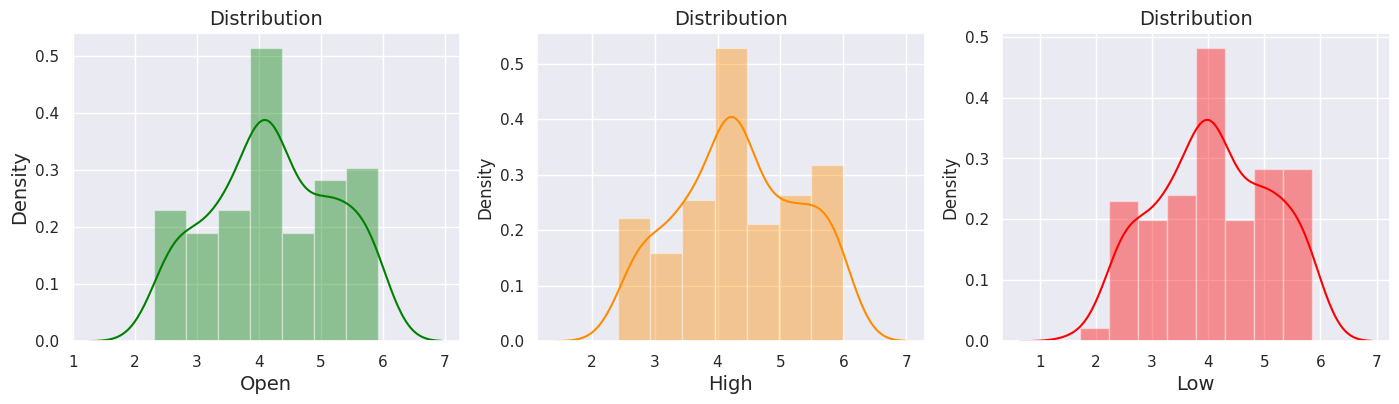

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(np.log(YBCPP['Open']), color = 'Green')
plt.title('Distribution', fontsize=14)
plt.xlabel('Open', fontsize= 14)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(np.log(YBCPP['High']), color = 'Darkorange')
plt.title('Distribution', fontsize=14)
plt.xlabel('High', fontsize= 14)

plt.subplot(1, 3, 3)
sns.distplot(np.log(YBCPP['Low']), color = 'Red')
plt.title('Distribution', fontsize=14)
plt.xlabel('Low', fontsize= 14)

plt.show()

## Applying sqrt transformation to make it more close to normal distribution.

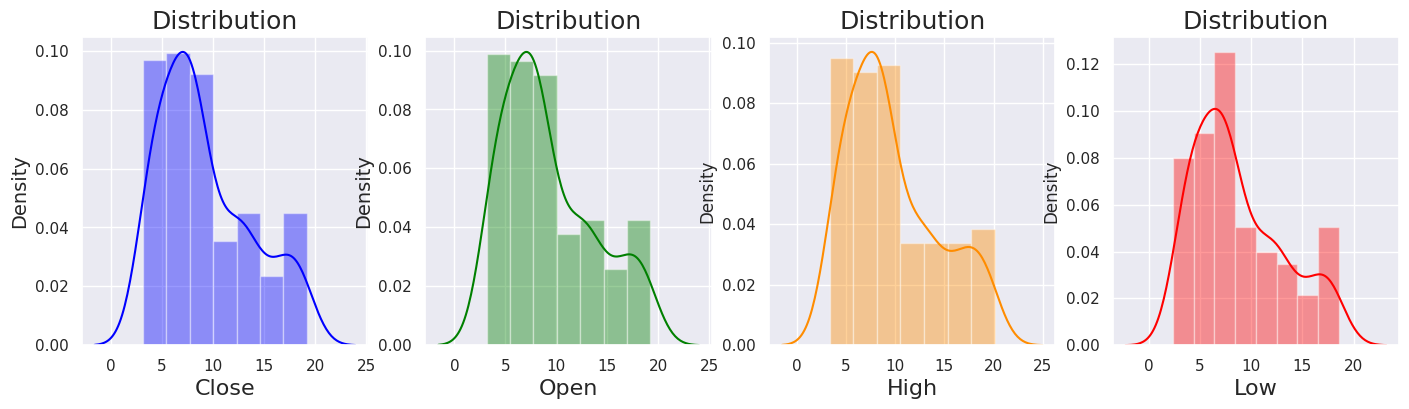

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 4, 1)
sns.distplot(np.sqrt(YBCPP['Close']), color = 'Blue')
plt.title('Distribution', fontsize=18)
plt.xlabel('Close', fontsize= 16)
plt.ylabel('Density', fontsize=14)


plt.subplot(1, 4, 2)
sns.distplot(np.sqrt(YBCPP['Open']), color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 4, 3)
sns.distplot(np.sqrt(YBCPP['High']), color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 4, 4)
sns.distplot(np.sqrt(YBCPP['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()

But skewness is still seen and shows that Normal Distribution is much better followed in log transformation itself.

# **BIVARIATE ANALYSIS**

# Now find out the relation between the Dependent Variable and independent Variable
scatter plot with Best Fit line

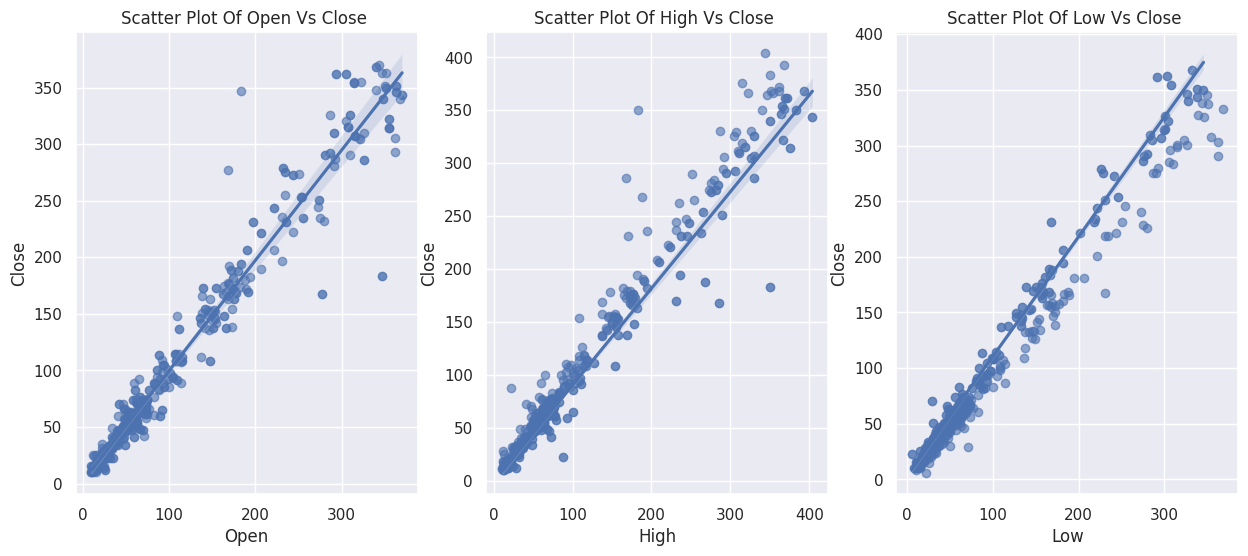

In [ ]:
plt.figure(figsize = (15,6))

plt.subplot(1, 3, 1)
plt.scatter(YBCPP['Close'], YBCPP['Open'], alpha=0.6)
plt.title('Scatter Plot Of Open Vs Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= YBCPP)

plt.subplot(1, 3, 2)
plt.scatter(YBCPP['Close'], YBCPP['High'], alpha=0.6)
plt.title('Scatter Plot Of High Vs Close ')
plt.xlabel('High')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= YBCPP)

plt.subplot(1, 3, 3)
plt.scatter(YBCPP['Close'], YBCPP['Low'], alpha=0.6)
plt.title('Scatter Plot Of Low Vs Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= YBCPP)

plt.show()

# **Correlation**
Now, we will see the correlation between all the features in our data set

<Axes: >

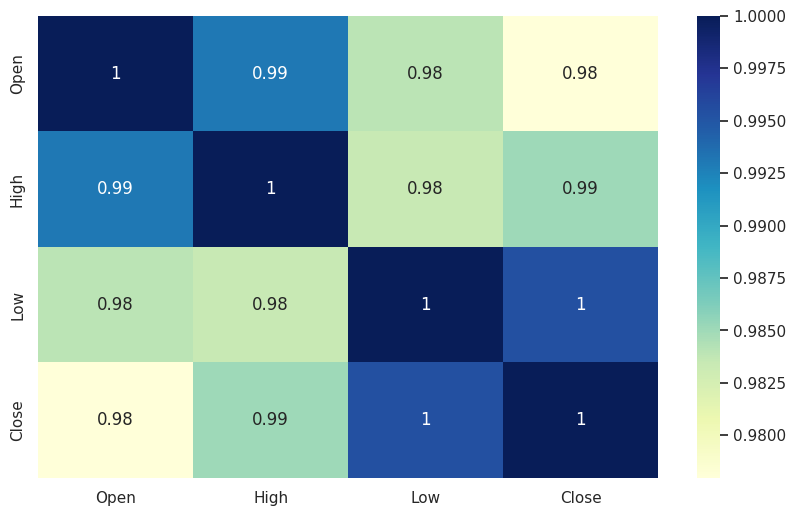

In [ ]:
# let's find all feature's correlation with Heatmap
# correlation
plt.figure(figsize=(10,6))
correlation = YBCPP.corr()
sns.heatmap(abs(correlation), annot = True, cmap='YlGnBu')

It can be clearly noted that there is a high correlation between all the features.

Hence, it is necessary to eliminate reduce correlation either by dropping features or establishing another feature which quantifies the variables which are not considered.

## **DURBIN WATSON TECHNIQUE- TO CHECK AUTO CORRELATION**

## Variance Inflation Factor (VIF) values of Independent Variables.

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [ ]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

calculate_vif(YBCPP[[i for i in YBCPP.describe().columns if i not in ['Date', 'Close']]])


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


We have the very High VIF of Open, High, Low features in our dataset so we have to drop them which is least correlated with dependent variable

In [ ]:
# Here we will drop the open feature from the VIF matrix
calculate_vif(YBCPP[[i for i in YBCPP.describe().columns if i not in ['Date', 'Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


After dropping the open feature from the VIF matrix

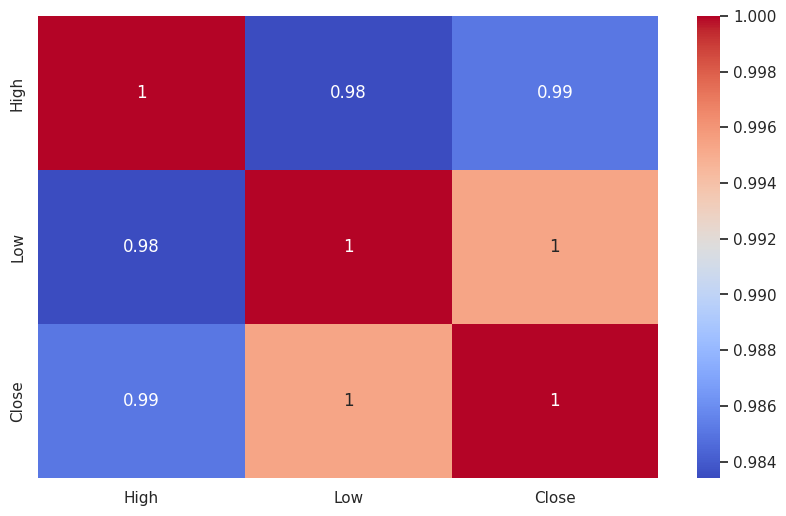

In [ ]:
# Correaltion of heatmap

plt.figure(figsize=(10,6))
sns.heatmap(YBCPP[['High','Low','Close']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

Still there is high correlation between the features, so lets try feature engineering.


# **Feature Engineering**

We can consider the average value of the features Open, High, Low and Close of the previous day for eliminating potential errors in the model we are building



In [ ]:
YBCPP.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
#Calculating average of Open, High and Low
YBCPP['avg_ybcpp']= YBCPP[['Open','High','Low','Close']].mean(axis=1).round(2)
     

<Axes: title={'center': 'Average YBCPP vs Close'}, xlabel='avg_ybcpp', ylabel='Close'>

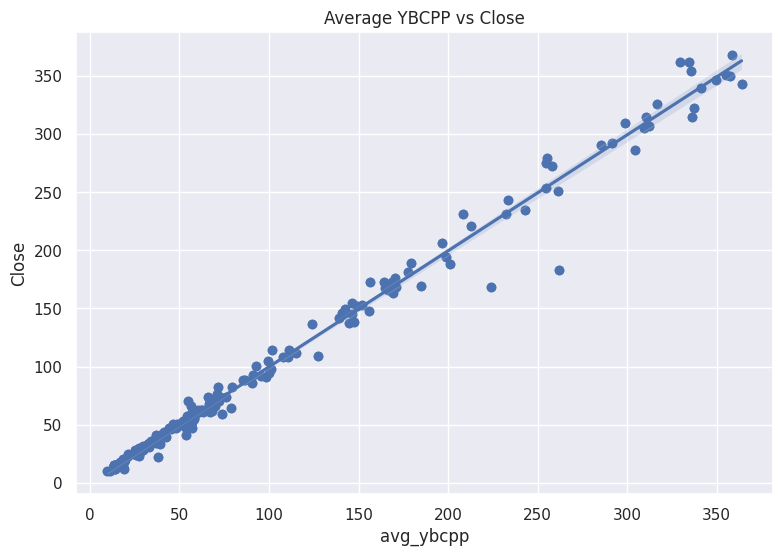

In [ ]:
plt.rcParams['figure.figsize']=(9,6)
plt.scatter(x=YBCPP['avg_ybcpp'],y=YBCPP['Close'])
plt.title("Average YBCPP vs Close")
plt.xlabel("Average price of YBCPP")
plt.ylabel("Closing Price")
sns.regplot(x="avg_ybcpp",y="Close", data= YBCPP)

Hence, it is clear that similar linear relationship exits between the new feature avg_ybcpp i.e., average of Open, High, Low and Close of previous day with current session Closing price of the stock

**Also, multicollinearity can be further reduced by considering lag variable of avg_ybcpp. By convention, stock markets are analysed with indicators whose lookback period spans to 14 previous data points such as 14-day Exponential Moving Average and 14 period Relative Strength Index(RSI) etc. Hence, 14 data points based lag can be ideally incorporated into the data set wherein, a weighted measure of the average of YBCPP for 14 consecutive session can be considered while forming linear regression equation**

In [ ]:
#incorporating lags
for i in range(1,15):
  YBCPP["lag{}".format(i)]= YBCPP.avg_ybcpp.shift(i)

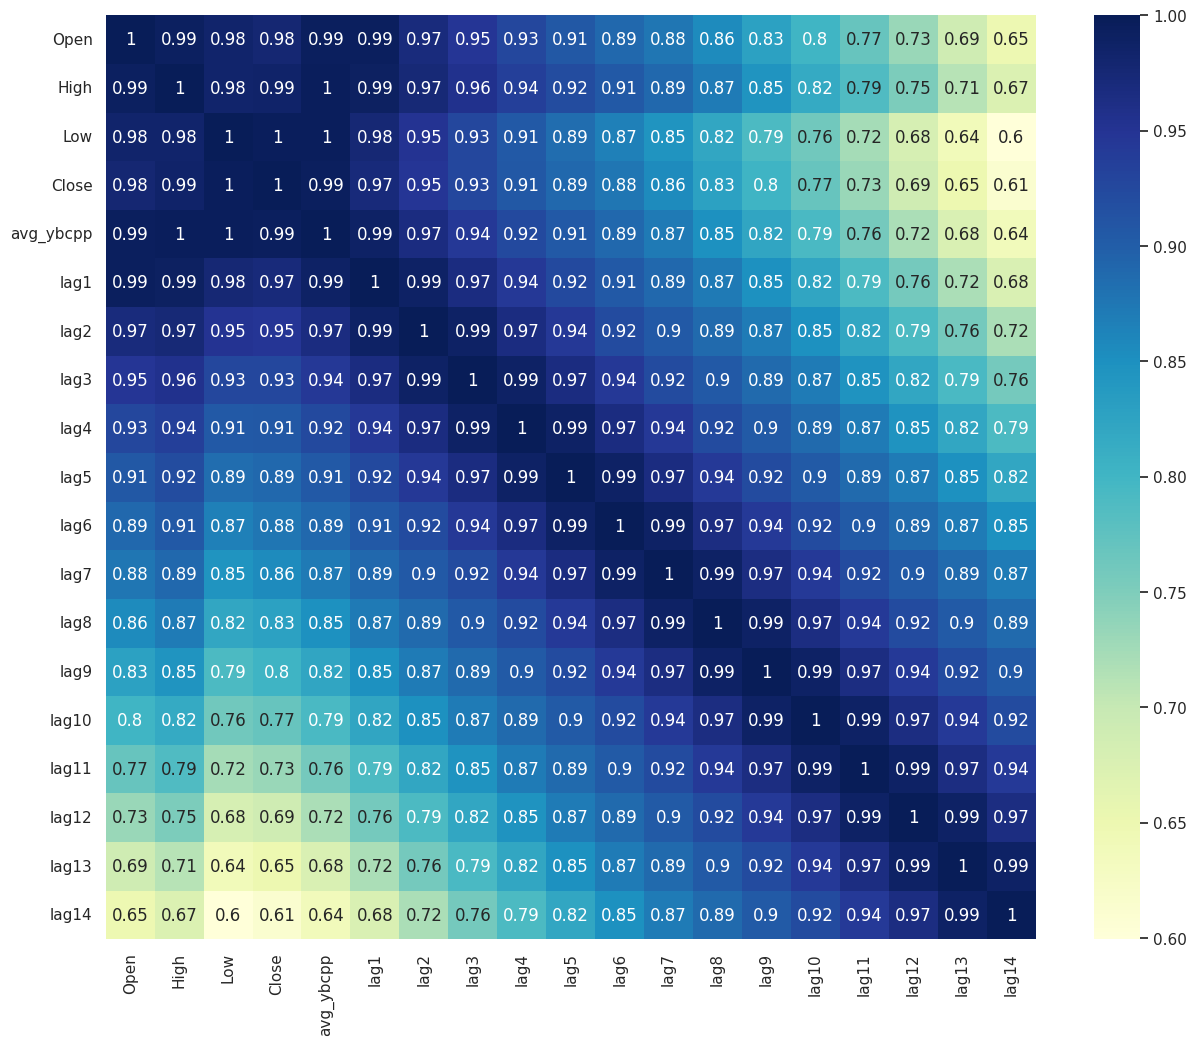

In [ ]:
#checking for multicollinearity
plt.figure(figsize=(15,12))
corr= sns.heatmap(YBCPP.corr(), cmap='YlGnBu', annot=True)

Thus, it is evident that introducing lag has significantly reduced correlation between variables

In [ ]:
#We can now drop other columns in the data frame except avg_ybcpp feature since it represents all other features
YBCPP.drop(columns=["Open","High","Low"],axis=1, inplace=True)
YBCPP.set_index(["Date"],inplace=True)
     

In [ ]:
YBCPP.describe()

,Close,avg_ybcpp,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14
count,185.000000,185.000000,184.000000,183.000000,182.000000,181.000000,180.000000,179.000000,178.000000,177.000000,176.000000,175.000000,174.000000,173.000000,172.000000,171.000000
mean,105.204703,105.449135,105.948587,106.456721,106.965385,107.479890,107.970111,108.418492,108.871067,109.343503,109.750057,110.165829,110.553046,110.862370,111.107791,111.438596
std,98.583153,98.251877,98.284187,98.311176,98.340606,98.367454,98.419878,98.511417,98.602516,98.680003,98.812774,98.941800,99.094277,99.297641,99.534926,99.732372
min,9.980000,9.850000,9.850000,9.850000,9.850000,9.850000,9.850000,9.850000,9.850000,9.850000,9.850000,9.850000,9.850000,9.850000,9.850000,9.850000
25%,33.450000,33.070000,33.077500,33.620000,34.600000,35.920000,36.722500,37.005000,37.137500,37.490000,37.372500,38.205000,37.847500,37.490000,37.372500,37.255000
50%,62.540000,63.620000,64.845000,66.070000,66.265000,66.460000,66.480000,66.500000,66.670000,66.840000,67.045000,67.250000,67.805000,68.360000,67.805000,68.360000
75%,153.300000,151.760000,152.717500,153.675000,154.632500,155.590000,155.765000,155.940000,156.115000,156.290000,158.240000,160.190000,162.140000,164.090000,164.197500,164.305000
max,367.900000,363.840000,363.840000,363.840000,363.840000,363.840000,363.840000,363.840000,363.840000,363.840000,363.840000,363.840000,363.840000,363.840000,363.840000,363.840000


# **Splitting and scaling data for training and testing**

In [ ]:
y= YBCPP.dropna().Close    #drops any NaN values in the data frame
x= YBCPP.dropna().drop(["Close"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(x, y, train_size=0.7,random_state=0)
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# We will build these regression models for our data.
Linear Regression

Ridge Rigression

Lasso Rigression

Elastic Net Regression

XG Boost Regrression


By using Cross-Validation, we will able to get more metrics and draw important conclusion both about our algorithm and our data.

# Implementing Linear Regression
Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.

You’ll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.
The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.
[ ]


## **Fitting Regression Curve**

In [ ]:
regressor= LinearRegression()    
regressor.fit(X_train, y_train)     #fitting linear regression model

LinearRegression()

In [ ]:
regressor.intercept_    #Fetching the intercept value
     

114.16890756302514

In [ ]:
regressor.coef_       #fetching coefficents

array([ 178.10777207, -127.93881952,   86.40590204,  -60.99883681,
         46.87620053,  -43.92259757,   42.34736091,  -33.91954534,
         17.90710902,  -16.22232275,   42.68755227,  -50.36827933,
         29.83210708,  -15.74823876,    6.19258697])

In [ ]:
y_pred_test= regressor.predict(X_test) #predicting value of closing price
     

In [ ]:
y_pred_train= regressor.predict(X_train)    #predicting values for trained data set

### **Testing the Regressrion Fit**

In [ ]:
#writing function to determine values of various evaluation metrics
def eval_metrics(y, y_hat):
  '''This function prints various evaluation metrics scores for the provided training and testing data sets'''
  r2= round(r2_score(y, y_hat),4)
  print(f"r2_score is: {r2}")
  mse= round(mean_squared_error(y, y_hat),4)
  print(f"MSE value is: {mse}")
  rmse= round(math.sqrt(mse),4)
  print(f"RMSE value is: {rmse}")
  mae= round(mean_absolute_error(y,y_hat),4)
  print(f"MAE value is: {mae}")
  mape= round(mean_absolute_percentage_error(y, y_hat),4)
  print(f"MAPE value is: {mape}")

In [ ]:
#Checking the values of evaluation metrices for training data set
eval_metrics(y_train, y_pred_train)
     

r2_score is: 0.9983
MSE value is: 18.0613
RMSE value is: 4.2499
MAE value is: 3.1966
MAPE value is: 0.0483


In [ ]:
#Checking the values of evaluation metrices for testing data set
eval_metrics(y_test, y_pred_test)
     

r2_score is: 0.9928
MSE value is: 59.4408
RMSE value is: 7.7098
MAE value is: 5.1616
MAPE value is: 0.0906


Hence, it is evident that linear regression model built is highly successful in predicting the Yes Bank Closing price for both training and testing data sets

### **Plotting and Visualization**

In [ ]:
#Defining functions to plot and visualize the data fit
def plotter(y,y_hat):
  ''' this function takes values of predictions and actual values(time series based with Date and Closing price as features) of two data sets for a given linear regression model of an equity'''
  df=pd.DataFrame(y)                          #Converts data into DataFrame
  df["Predicted Closing"] = list(y_hat)       #Adds Corresponding values of predicted closing price to the dataframe
  df.sort_values(by="Date", inplace=True)     #sorts the data according to the timeseries based on the date
  plt.figure(figsize=(10,7))                 #sets figure size
  plt.plot("Predicted Closing", color='green', data=df)       #plots predicted closing price in green
  plt.plot("Close", color='red', data=df)     #plots actual closing price in red
  plt.xlabel("Date")                          #assigns X label
  plt.ylabel("Price")                         #assigns Y label
  plt.legend(["Predicted Closing", "Actual Closing"])   #assigns the legend for Actual and predicted curves
  plt.suptitle("Predicted VS Actual Closing price")   #provides the main title for the chart
  plt.grid(True)     

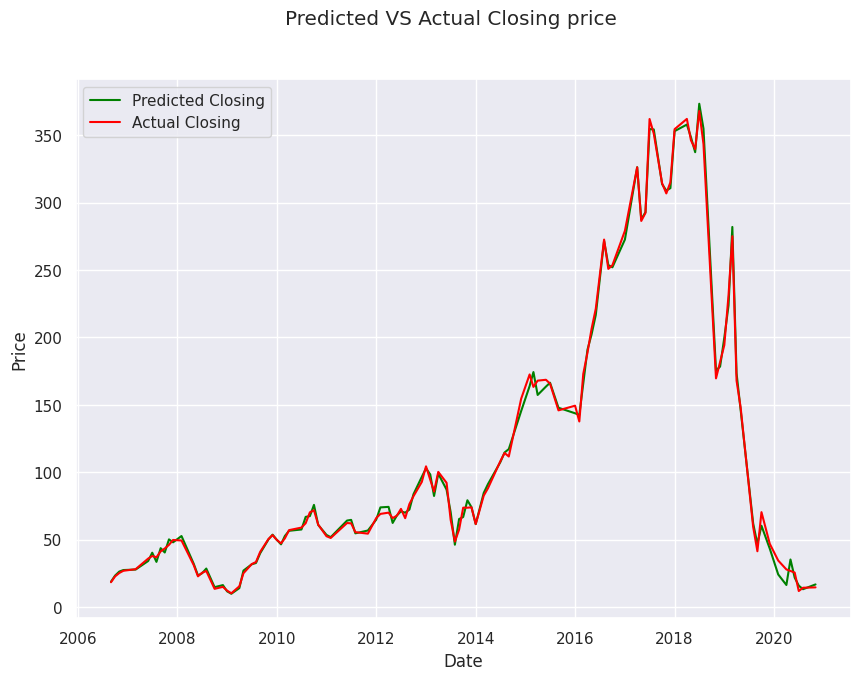

In [ ]:
plotter(y=y_train, y_hat= y_pred_train)     #providing the function with data sets

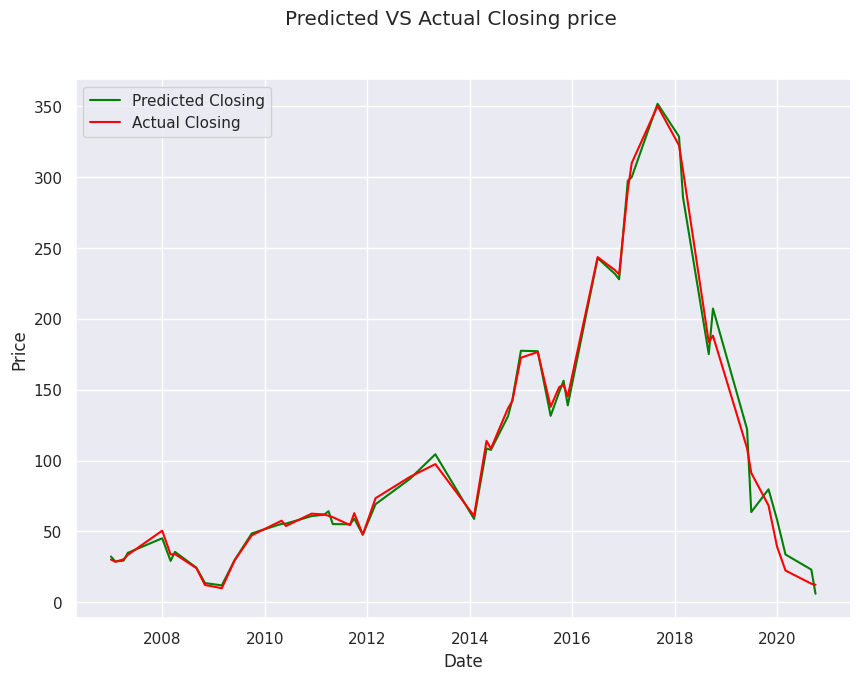

In [ ]:
plotter(y_test,y_pred_test)


Hence, from visualizations for both trained data and testing data sets, its clear that linear regression model is successful in predicting the closing price for Yes Bank



## **Ridge and Lasso Regression**

*   Ridge and Lasso Regression are types of Regularization techniques

*   Regularization techniques are used to deal with overfitting and when the dataset is large
*   Ridge and Lasso Regression involve adding penalties to the regression function








In [ ]:
ridge= Ridge(alpha= 0.1, max_iter=1000)        
ridge.fit(X_train, y_train)     #fitting ridge regression model
     

Ridge(alpha=0.1, max_iter=1000)

In [ ]:
ridge.score(X_train, y_train)   #getting score for the fitted ridge regression model on training data set

0.9972667327549327

In [ ]:
ridge.score(X_test, y_test)     #getting score for the ridge model fitted on Testing data set
     

0.994392694939564

In [ ]:
y_pred_train_ridge= ridge.predict(X_train)      #fetching predicted values for trained data set
y_pred_ridge= ridge.predict(X_test)             #fetching predicted values for test data set

In [ ]:
#fetching evaluation metrics scores for ridge regression model
eval_metrics(y= y_test, y_hat= y_pred_ridge)

r2_score is: 0.9944
MSE value is: 46.2026
RMSE value is: 6.7972
MAE value is: 4.3037
MAPE value is: 0.0614


In [ ]:
eval_metrics(y_train, y_pred_train_ridge)

r2_score is: 0.9973
MSE value is: 28.4111
RMSE value is: 5.3302
MAE value is: 3.7477
MAPE value is: 0.045


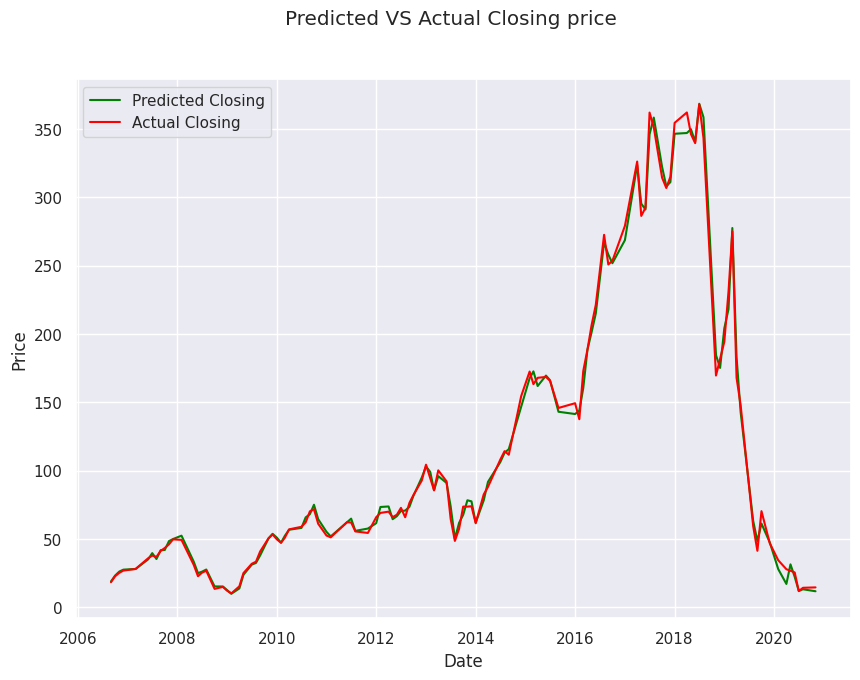

In [ ]:
#plotting the predicted values for train data set
plotter(y_train, y_pred_train_ridge)

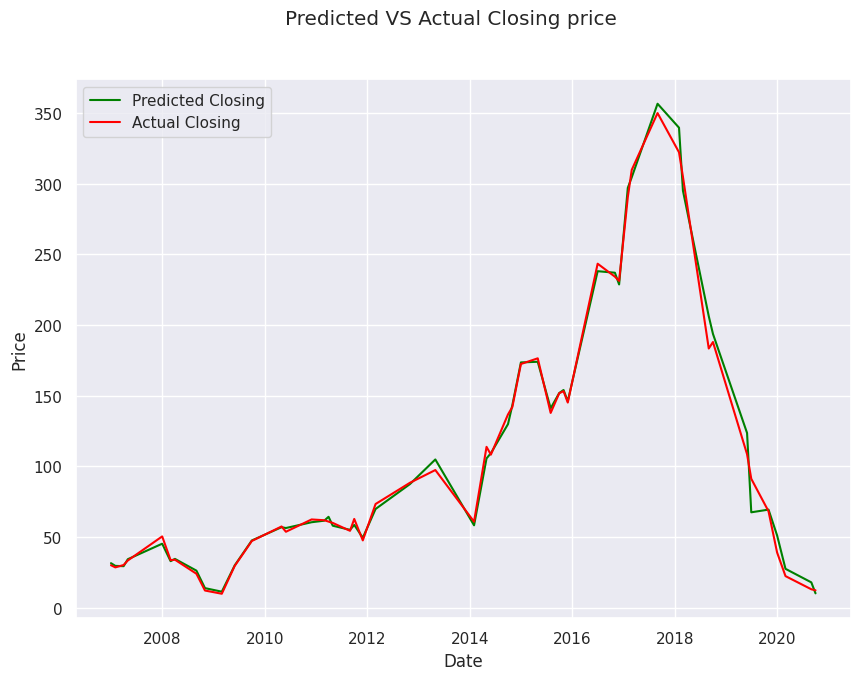

In [ ]:
#plotting the predicted values for test data sets
plotter(y= y_test, y_hat= y_pred_ridge)

# Implementing Cross Validation Of Ridge

Cross-Validation is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

    *   To overcome over-fitting problems, we use a technique called Cross-Validation.

    *   Let’s dive deep and learn about some of the model evaluation techniques.



### Cross Validation of Ridge Regression Model

Cross validation will be done using GridSearchCV from SciKitLearn Library

In [ ]:
parameters= {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge= Ridge()
regression_ridge= GridSearchCV(ridge,param_grid= parameters, scoring= 'neg_mean_squared_error', cv=10)
regression_ridge.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
best_ridge_pred_test= regression_ridge.predict(X_test)      #fetching predicted values for test data set
     

In [ ]:
best_ridge_pred_train= regression_ridge.predict(X_train)    #fetching predicted values for train data set
     

In [ ]:
print("Best value for alpha is: ", regression_ridge.best_params_['alpha'])
print("Best score for the model is:", round(regression_ridge.best_score_,3))

Best value for alpha is:  1e-15
Best score for the model is: -58.929


In [ ]:
#Fetching various evaluation metrics scores for test data sets
eval_metrics(y_test, best_ridge_pred_test)

r2_score is: 0.9928
MSE value is: 59.4408
RMSE value is: 7.7098
MAE value is: 5.1616
MAPE value is: 0.0906


In [ ]:
eval_metrics(y_train,best_ridge_pred_train )
     

r2_score is: 0.9983
MSE value is: 18.0613
RMSE value is: 4.2499
MAE value is: 3.1966
MAPE value is: 0.0483


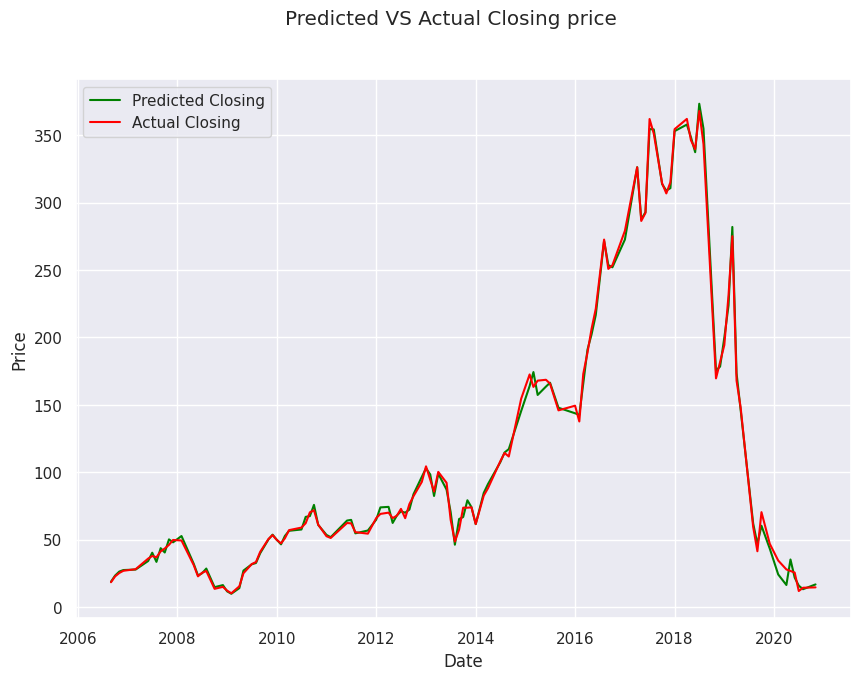

In [ ]:
#plotting the predicted values of train data set against actual values in train data set for the best model as per L2 regularization aka Ridge Regression
plotter(y_train, best_ridge_pred_train)

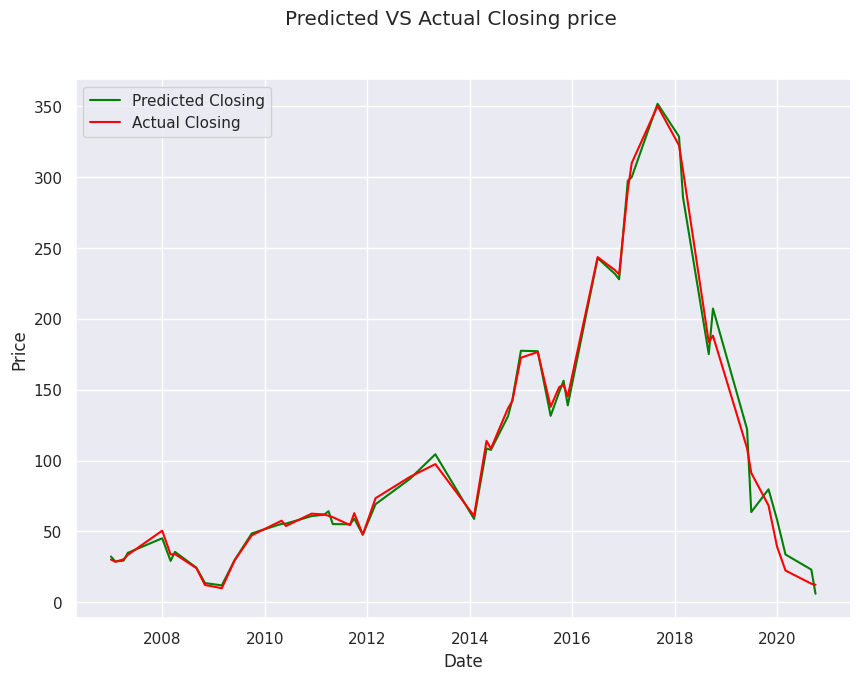

In [ ]:
#plotting the predicted values of test data set against actual values in test data set as per L2 regularization aka Ridge Regression
plotter(y_test, best_ridge_pred_test)

### **Lasso Regression**

Lasso regression by penalizing parameters of the Regression model using sum of the absolute values of the coefficients

In [ ]:

lasso_model = Lasso(alpha= 0.1, max_iter=1000)
lasso_model.fit(X_train,y_train)                  #fitting Lasso Regression Model on Training data sets

Lasso(alpha=0.1)

In [ ]:
#fetching the model score on train data set
lasso_model.score(X_train, y_train)

0.9954833564141504

In [ ]:
#fetching model score on test data set
lasso_model.score(X_test, y_test)

0.9944232702277216

In [ ]:
lasso_train_pred= lasso_model.predict(X_train)      #Predicting values for training data set
lasso_test_pred= lasso_model.predict(X_test)        #Predicting values for test data set

In [ ]:
#Fetching various evaluation metrics scores for the Lasso model on train data
eval_metrics(y_train, lasso_train_pred)

r2_score is: 0.9955
MSE value is: 46.9486
RMSE value is: 6.8519
MAE value is: 4.3502
MAPE value is: 0.0483


In [ ]:
#Fetching various evaluation metrics scores for the Lasso model on train data
eval_metrics(y_test, lasso_test_pred)

r2_score is: 0.9944
MSE value is: 45.9507
RMSE value is: 6.7787
MAE value is: 3.9681
MAPE value is: 0.0499


### Implementing 10 fold GridSearchCV Cross Validation for Lasso Regression

In [ ]:
lasso= Lasso()
parameters= {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
regression_lasso= GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv= 10)
     

In [ ]:
regression_lasso.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best value for alpha is: ", regression_lasso.best_params_['alpha'])
print("Best score for the model is:", round(regression_lasso.best_score_,3))

Best value for alpha is:  0.001
Best score for the model is: -68.638


In [ ]:
best_lasso_pred_train= regression_lasso.predict(X_train)      #Predicting values for training data set after finding the best value of alpha
best_lasso_pred_test= regression_lasso.predict(X_test)        #Predicting values for test data set after finding the best value of alpha

In [ ]:
#Fetching various evaluation metrics scores for train data sets
eval_metrics(y_train, best_lasso_pred_train)
     

r2_score is: 0.9981
MSE value is: 20.2524
RMSE value is: 4.5003
MAE value is: 3.3126
MAPE value is: 0.0427


In [ ]:
#Fetching various evaluation metrics scores for test data sets
eval_metrics(y_test, best_lasso_pred_test)
     

r2_score is: 0.9943
MSE value is: 46.6277
RMSE value is: 6.8284
MAE value is: 4.3868
MAPE value is: 0.0748


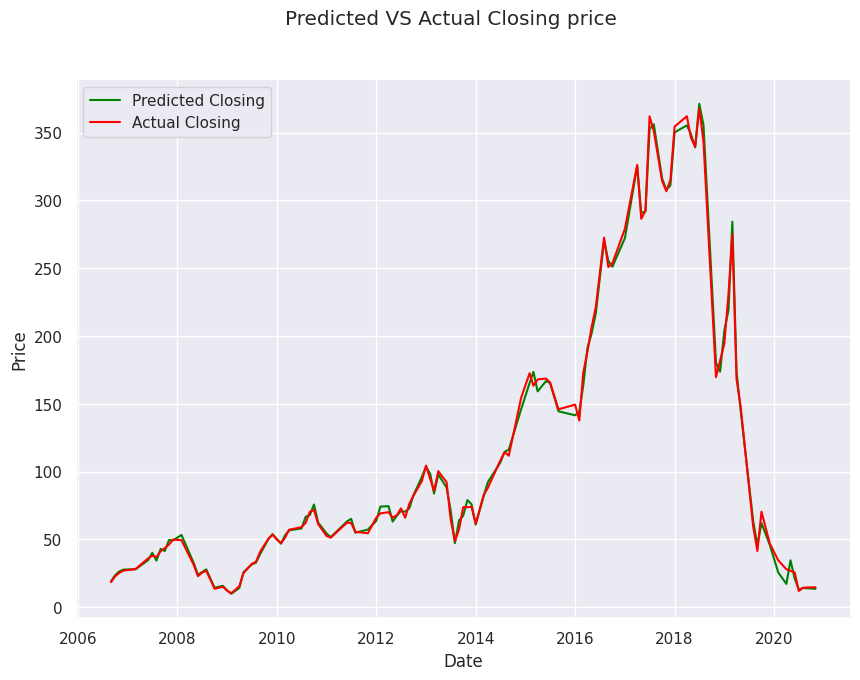

In [ ]:
#plotting predicted values of closing price by Lasso Regression model against actual values with respect to train data
plotter(y_train, best_lasso_pred_train)
     

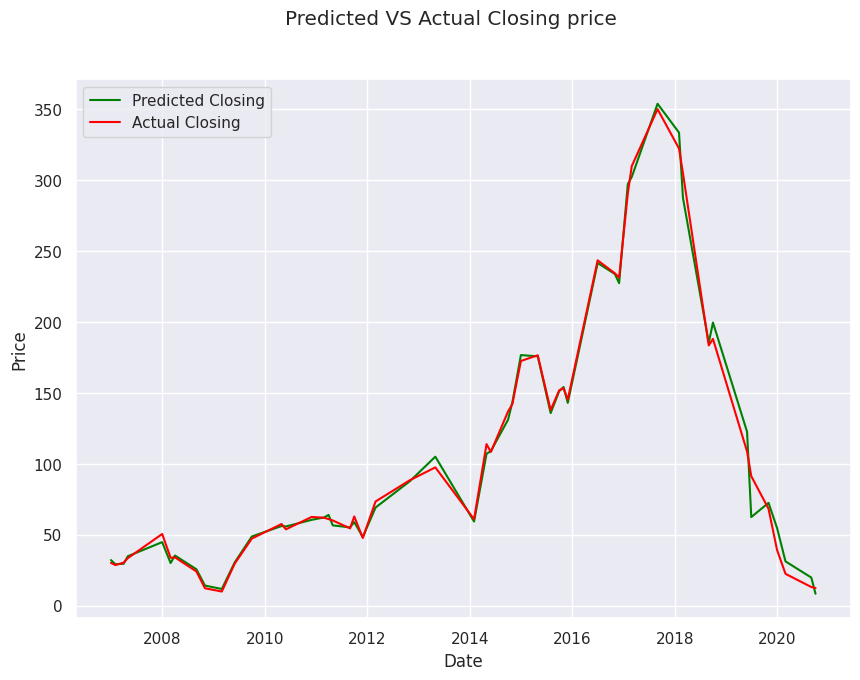

In [ ]:
#plotting predicted values of closing price by Lasso Regression model against actual values with respect to test data
plotter(y_test, best_lasso_pred_test)
     

### **ElasticNet Regression and Cross Validation**

Elastic Net Regression model overcomes limitations of Lasso regression by combining both weights used in L1 and L2 regularizations to minimize the loss function thereby achieving better trade off between bias and variance in the model it fits

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_model= ElasticNet(alpha=0.1, l1_ratio= 0.5, max_iter=1000)
elastic_model.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elastic_model.score(X_train, y_train)

0.9802115821562759

In [ ]:
elastic_train_pred= elastic_model.predict(X_train)      #Predicting values for training data set
elastic_test_pred= elastic_model.predict(X_test)        #Predicting values for test data set
     

In [ ]:
#Fetching various evaluation metrics scores for the Elastic Net model on train data
eval_metrics(y_train, elastic_train_pred)

r2_score is: 0.9802
MSE value is: 205.6921
RMSE value is: 14.342
MAE value is: 9.5265
MAPE value is: 0.1152


In [ ]:
#Fetching various evaluation metrics scores for the Elastic Net model on test data
eval_metrics(y_test, elastic_test_pred)

r2_score is: 0.9446
MSE value is: 456.8578
RMSE value is: 21.3742
MAE value is: 11.279
MAPE value is: 0.1214


### 10 fold GridSearchCV cross validation on Elastic Net regression model

In [ ]:
elastic= ElasticNet()
parameters= {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2]}
regression_elastic= GridSearchCV(elastic, parameters, scoring= 'neg_mean_squared_error', cv=10)
regression_elastic.fit(X_train, y_train)
     

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1, 1.5, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best value for alpha is: ", regression_elastic.best_params_['alpha'])
print("Best value for alpha is: ", regression_elastic.best_params_['l1_ratio'])
print("Best score for the model is:", round(regression_lasso.best_score_,3))

Best value for alpha is:  0.001
Best value for alpha is:  1
Best score for the model is: -68.638


In [ ]:
best_elastic_pred_train= regression_elastic.predict(X_train)      #Predicting values for training data set after hyper parameters tuning
best_elastic_pred_test= regression_elastic.predict(X_test)        #Predicting values for test data set after hyper parameters tuning

In [ ]:
#Fetching various evaluation metrics scores for train data set
eval_metrics(y_train, best_elastic_pred_train)
     

r2_score is: 0.9981
MSE value is: 20.2524
RMSE value is: 4.5003
MAE value is: 3.3126
MAPE value is: 0.0427


In [ ]:
#Fetching various evaluation metrics scores for test data set
eval_metrics(y_test, best_elastic_pred_test)

r2_score is: 0.9943
MSE value is: 46.6277
RMSE value is: 6.8284
MAE value is: 4.3868
MAPE value is: 0.0748


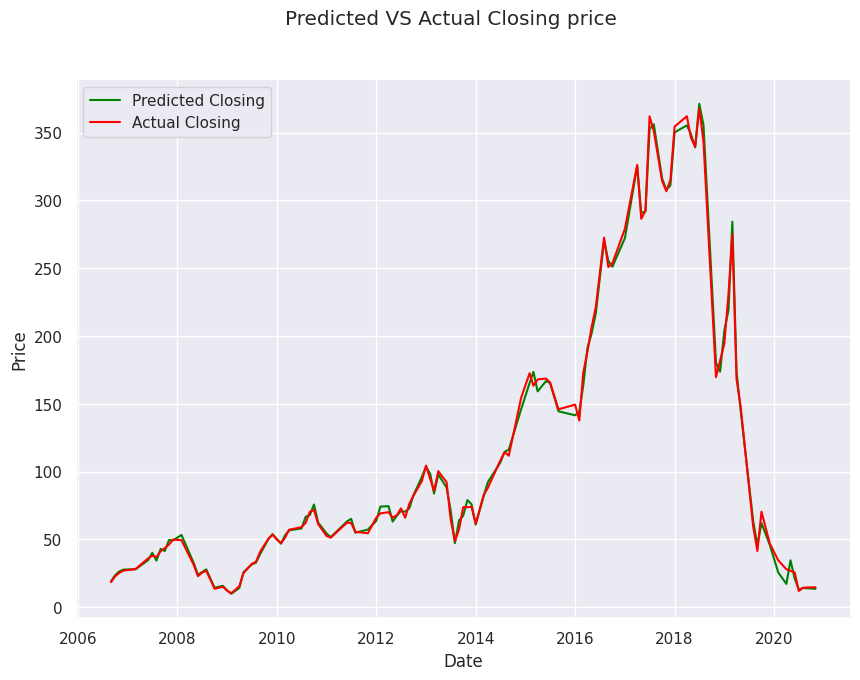

In [ ]:
#plotting predicted values of closing price by Elastic Net Regression model against actual values with respect to train data
plotter(y_train, best_elastic_pred_train)

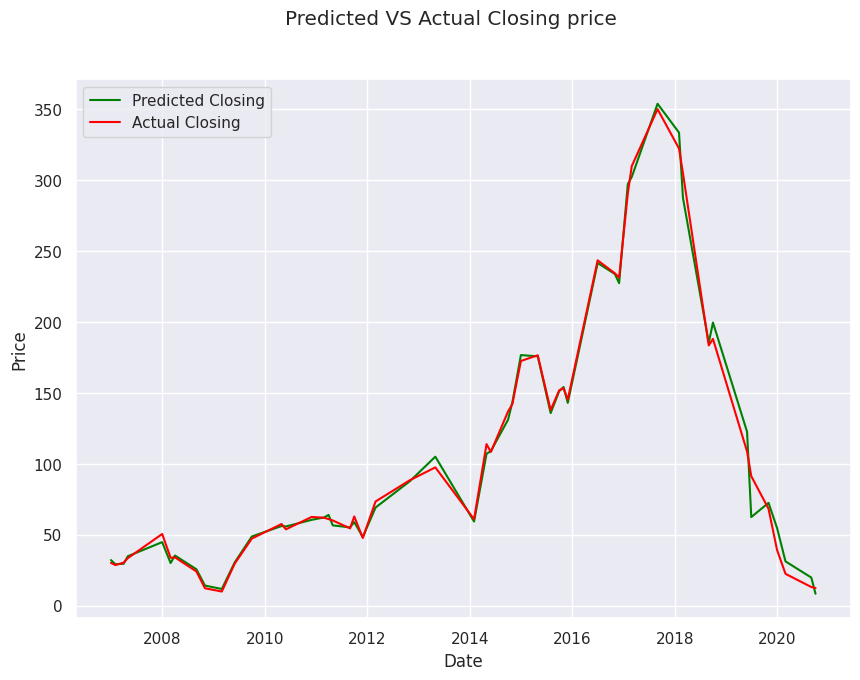

In [ ]:
#plotting predicted values of closing price by Elastic Net Regression model against actual values with respect to test data
plotter(y_test, best_elastic_pred_test)
     

### **XGBoost Model**

In [ ]:
xgb= XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb.score(X_train,y_train)

0.9999999999166659

In [ ]:
xgb_train_pred= xgb.predict(X_train)
xgb_test_pred= xgb.predict(X_test)

In [ ]:
eval_metrics(y_train, xgb_train_pred)

r2_score is: 1.0
MSE value is: 0.0
RMSE value is: 0.0
MAE value is: 0.0007
MAPE value is: 0.0


In [ ]:
eval_metrics(y_test, xgb_test_pred)

r2_score is: 0.9583
MSE value is: 343.4699
RMSE value is: 18.5329
MAE value is: 9.4428
MAPE value is: 0.1014


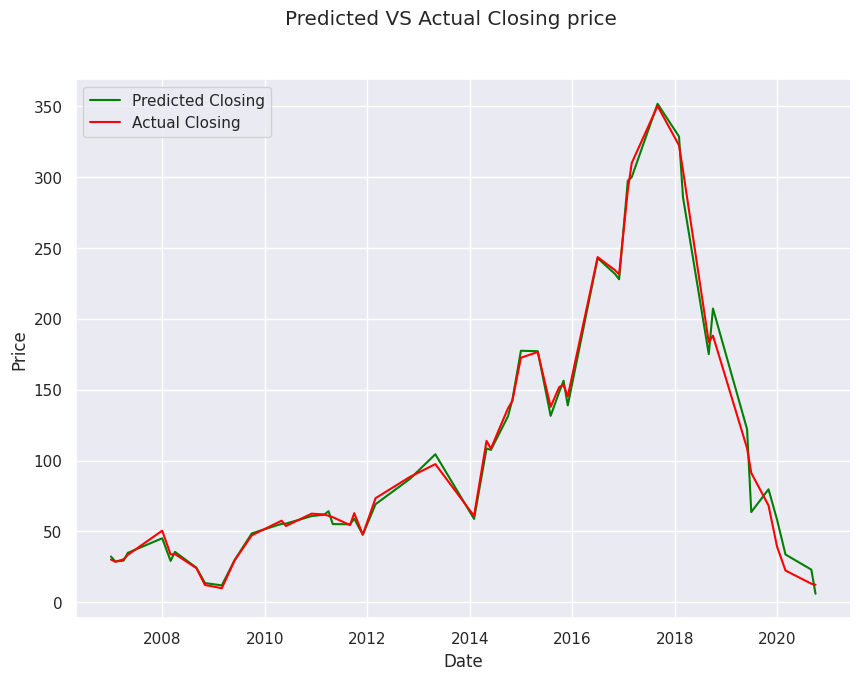

In [ ]:
plotter(y_test, y_pred_test)

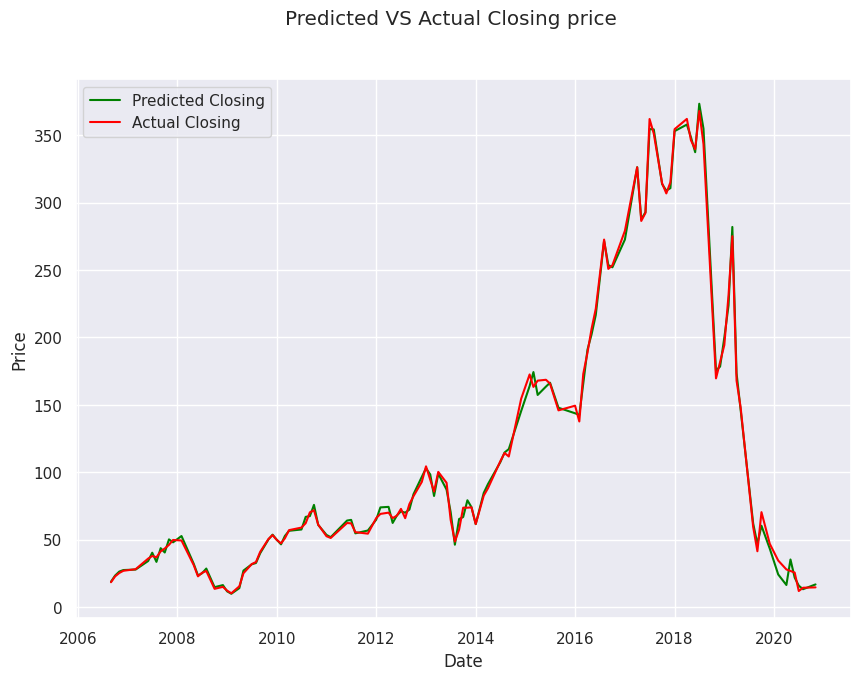

In [ ]:
plotter(y_train, y_pred_train)

### **implementing 10 fold cross validation of XGBoost model**

In [ ]:
parameters= {'n_estimators': [400, 700, 1000],'colsample_bytree': [0.7, 0.8],'max_depth': [15,20,25],'reg_alpha': [1.1, 1.2, 1.3],'reg_lambda': [1.1, 1.2, 1.3],'subsample': [0.7, 0.8, 0.9]}
xgb= XGBRegressor(objective='reg:squarederror')
regression_xgb= GridSearchCV(xgb, parameters, scoring= 'neg_mean_squared_error', cv=10)
regression_xgb.fit(X_train, y_train)
     

In [ ]:
#printing the best parameter values among the list of passed parameters
for key in parameters:
  print(f"The best value of the parameter {key} is:" ,regression_xgb.best_params_[key])

In [ ]:
best_xgb_pred_train= regression_xgb.predict(X_train)
best_xgb_pred_test= regression_xgb.predict(X_test)

In [ ]:
#fetching various evaluation metrics scores on train data after hyper tuning
eval_metrics(y_train, best_xgb_pred_train)

In [ ]:
#fetching various evaluation metrics scores on test data after hyper tuning
eval_metrics(y_test, best_xgb_pred_test)
     

In [ ]:
#plotting predicted values of closing price by XGB Regression model against actual values with respect to train data
plotter(y_train, best_xgb_pred_train)

In [ ]:
#plotting predicted values of closing price by XGB Regression model against actual values with respect to test data
plotter(y_test, best_xgb_pred_test)

## **Summary and Conclusion**

# **Conclusion**
1. The popularity of stock closing is growing extremely rapidly day by day which encourage researcher to find new methods if any fraud happens.

2. This technique is used for prediction is not only helpful to researchers to predict future stock closing prices or any fraud happen or not but also helps investors or any person who dealing with the stock market in order to prediction of model with good accuracy.

3. In this work we use linear regression technique, lasso regression, ridge regression, elastic net regression and XGBoost Regression technique. these five models gives us the following results

4. High, low, open are directly correlate with the closing price of stocks

5. Target variable(dependent variable) strongly dependent on independent variables

6. Xgboost regression is best model for yes bank stock closing price data this model use for further prediction
